In [2]:

# verify data loading
import pandas as pd
import os

data_path = '../data/raw'
for file in os.listdir(data_path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_path, file))
        print(f"\nFile: {file}")
        print(f"Shape: {df.shape}")
        print("Columns:", df.columns.tolist())
        print("Missing values:", df.isnull().sum().sum())


File: olist_sellers_dataset.csv
Shape: (3095, 4)
Columns: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
Missing values: 0

File: product_category_name_translation.csv
Shape: (71, 2)
Columns: ['product_category_name', 'product_category_name_english']
Missing values: 0

File: olist_orders_dataset.csv
Shape: (99441, 8)
Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Missing values: 4908

File: olist_order_items_dataset.csv
Shape: (112650, 7)
Columns: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
Missing values: 0

File: olist_customers_dataset.csv
Shape: (99441, 5)
Columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
Missing values: 0

File: olist_geolocation_dataset.csv
Shape: (1000163, 5)
Columns:

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# 1. Data Loading
# Define paths
RAW_DATA_PATH = "../data/raw/"

# Load all datasets
customers_df = pd.read_csv(f"{RAW_DATA_PATH}olist_customers_dataset.csv")
orders_df = pd.read_csv(f"{RAW_DATA_PATH}olist_orders_dataset.csv")
order_items_df = pd.read_csv(f"{RAW_DATA_PATH}olist_order_items_dataset.csv")
products_df = pd.read_csv(f"{RAW_DATA_PATH}olist_products_dataset.csv")
sellers_df = pd.read_csv(f"{RAW_DATA_PATH}olist_sellers_dataset.csv")

In [8]:
# Display basic information about loaded datasets
print("Datasets Overview:")
for name, df in [("Customers", customers_df), 
                ("Orders", orders_df),
                ("Order Items", order_items_df),
                ("Products", products_df),
                ("Sellers", sellers_df)]:
    print(f"\n{name} Dataset Shape:", df.shape)

Datasets Overview:

Customers Dataset Shape: (99441, 5)

Orders Dataset Shape: (99441, 8)

Order Items Dataset Shape: (112650, 7)

Products Dataset Shape: (32951, 9)

Sellers Dataset Shape: (3095, 4)


In [9]:
# 2. Initial Data Quality Check

def check_data_quality(df, dataset_name):
    """
    Perform initial data quality checks on dataframe
    """
    print(f"\n{'='*50}")
    print(f"Data Quality Report for {dataset_name}")
    print(f"{'='*50}")
    
    # Basic information
    print("\nBasic Information:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    print("\nMissing Values:")
    for col, miss in missing.items():
        if miss > 0:
            print(f"{col}: {miss} values ({missing_pct[col]:.2f}%)")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates}")
    
    # Data types
    print("\nData Types:")
    print(df.dtypes)
    
    # Basic statistics
    print("\nNumerical Columns Statistics:")
    display(df.describe())

# Run quality check for each dataset
for name, df in [("Customers", customers_df), 
                ("Orders", orders_df),
                ("Order Items", order_items_df),
                ("Products", products_df),
                ("Sellers", sellers_df)]:
    check_data_quality(df, name)


Data Quality Report for Customers

Basic Information:
Number of rows: 99441
Number of columns: 5

Missing Values:

Duplicate rows: 0

Data Types:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Numerical Columns Statistics:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000



Data Quality Report for Orders

Basic Information:
Number of rows: 99441
Number of columns: 8

Missing Values:
order_approved_at: 160 values (0.16%)
order_delivered_carrier_date: 1783 values (1.79%)
order_delivered_customer_date: 2965 values (2.98%)

Duplicate rows: 0

Data Types:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Numerical Columns Statistics:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



Data Quality Report for Order Items

Basic Information:
Number of rows: 112650
Number of columns: 7

Missing Values:

Duplicate rows: 0

Data Types:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Numerical Columns Statistics:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000



Data Quality Report for Products

Basic Information:
Number of rows: 32951
Number of columns: 9

Missing Values:
product_category_name: 610 values (1.85%)
product_name_lenght: 610 values (1.85%)
product_description_lenght: 610 values (1.85%)
product_photos_qty: 610 values (1.85%)
product_weight_g: 2 values (0.01%)
product_length_cm: 2 values (0.01%)
product_height_cm: 2 values (0.01%)
product_width_cm: 2 values (0.01%)

Duplicate rows: 0

Data Types:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Numerical Columns Statistics:


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



Data Quality Report for Sellers

Basic Information:
Number of rows: 3095
Number of columns: 4

Missing Values:

Duplicate rows: 0

Data Types:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Numerical Columns Statistics:


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000



Distribution Analysis for Customers


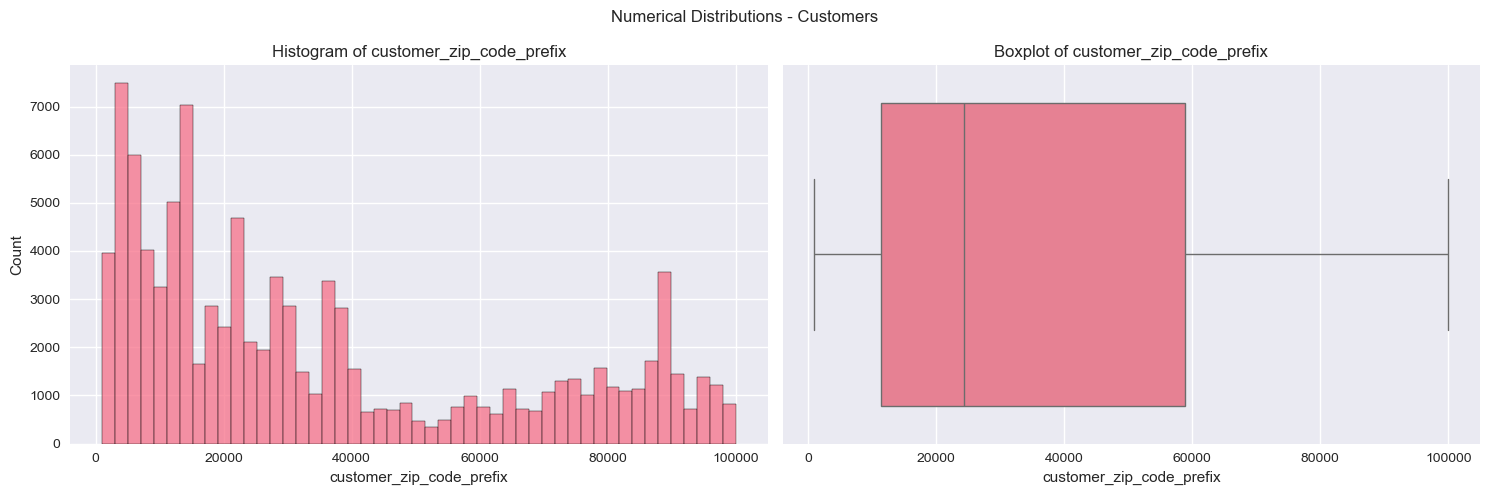


Distribution Analysis for Orders

Distribution Analysis for Order Items


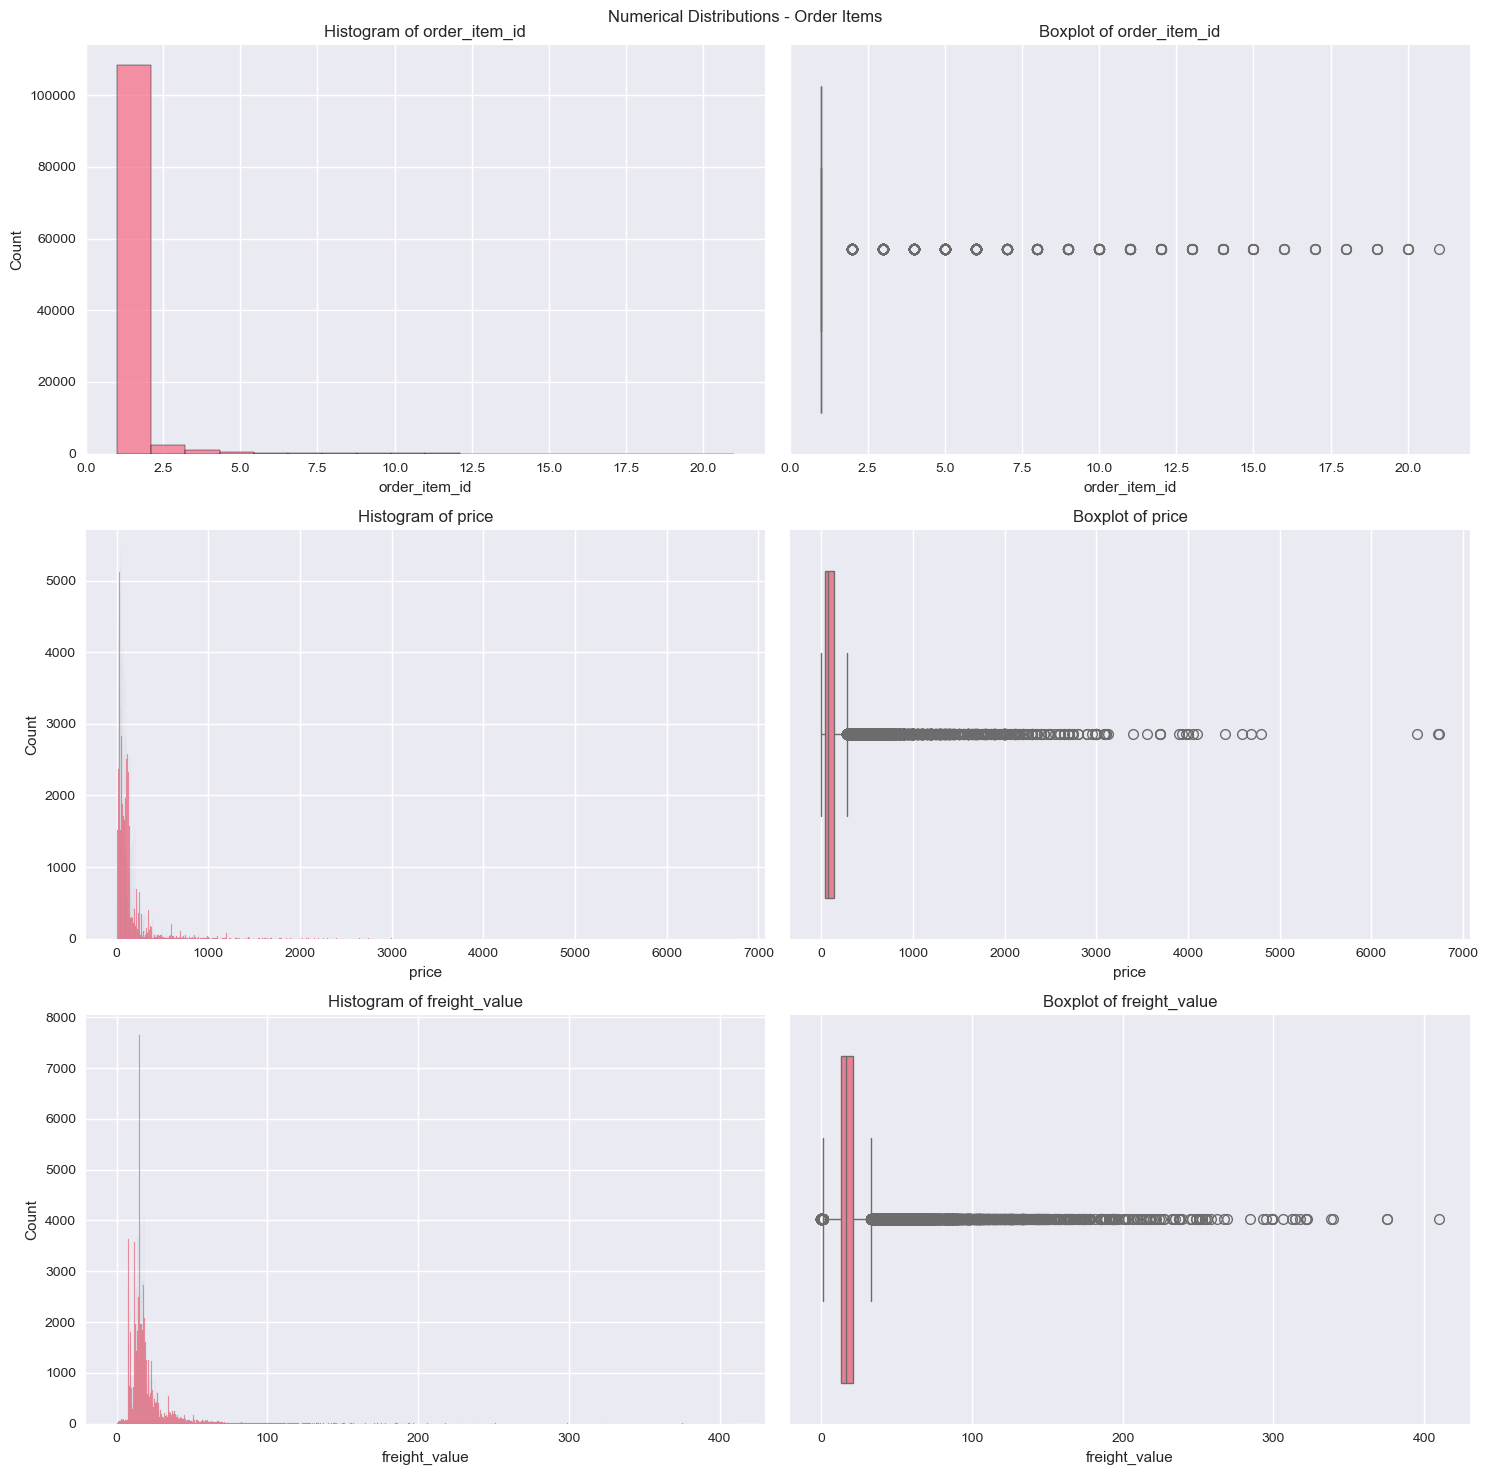


Distribution Analysis for Products


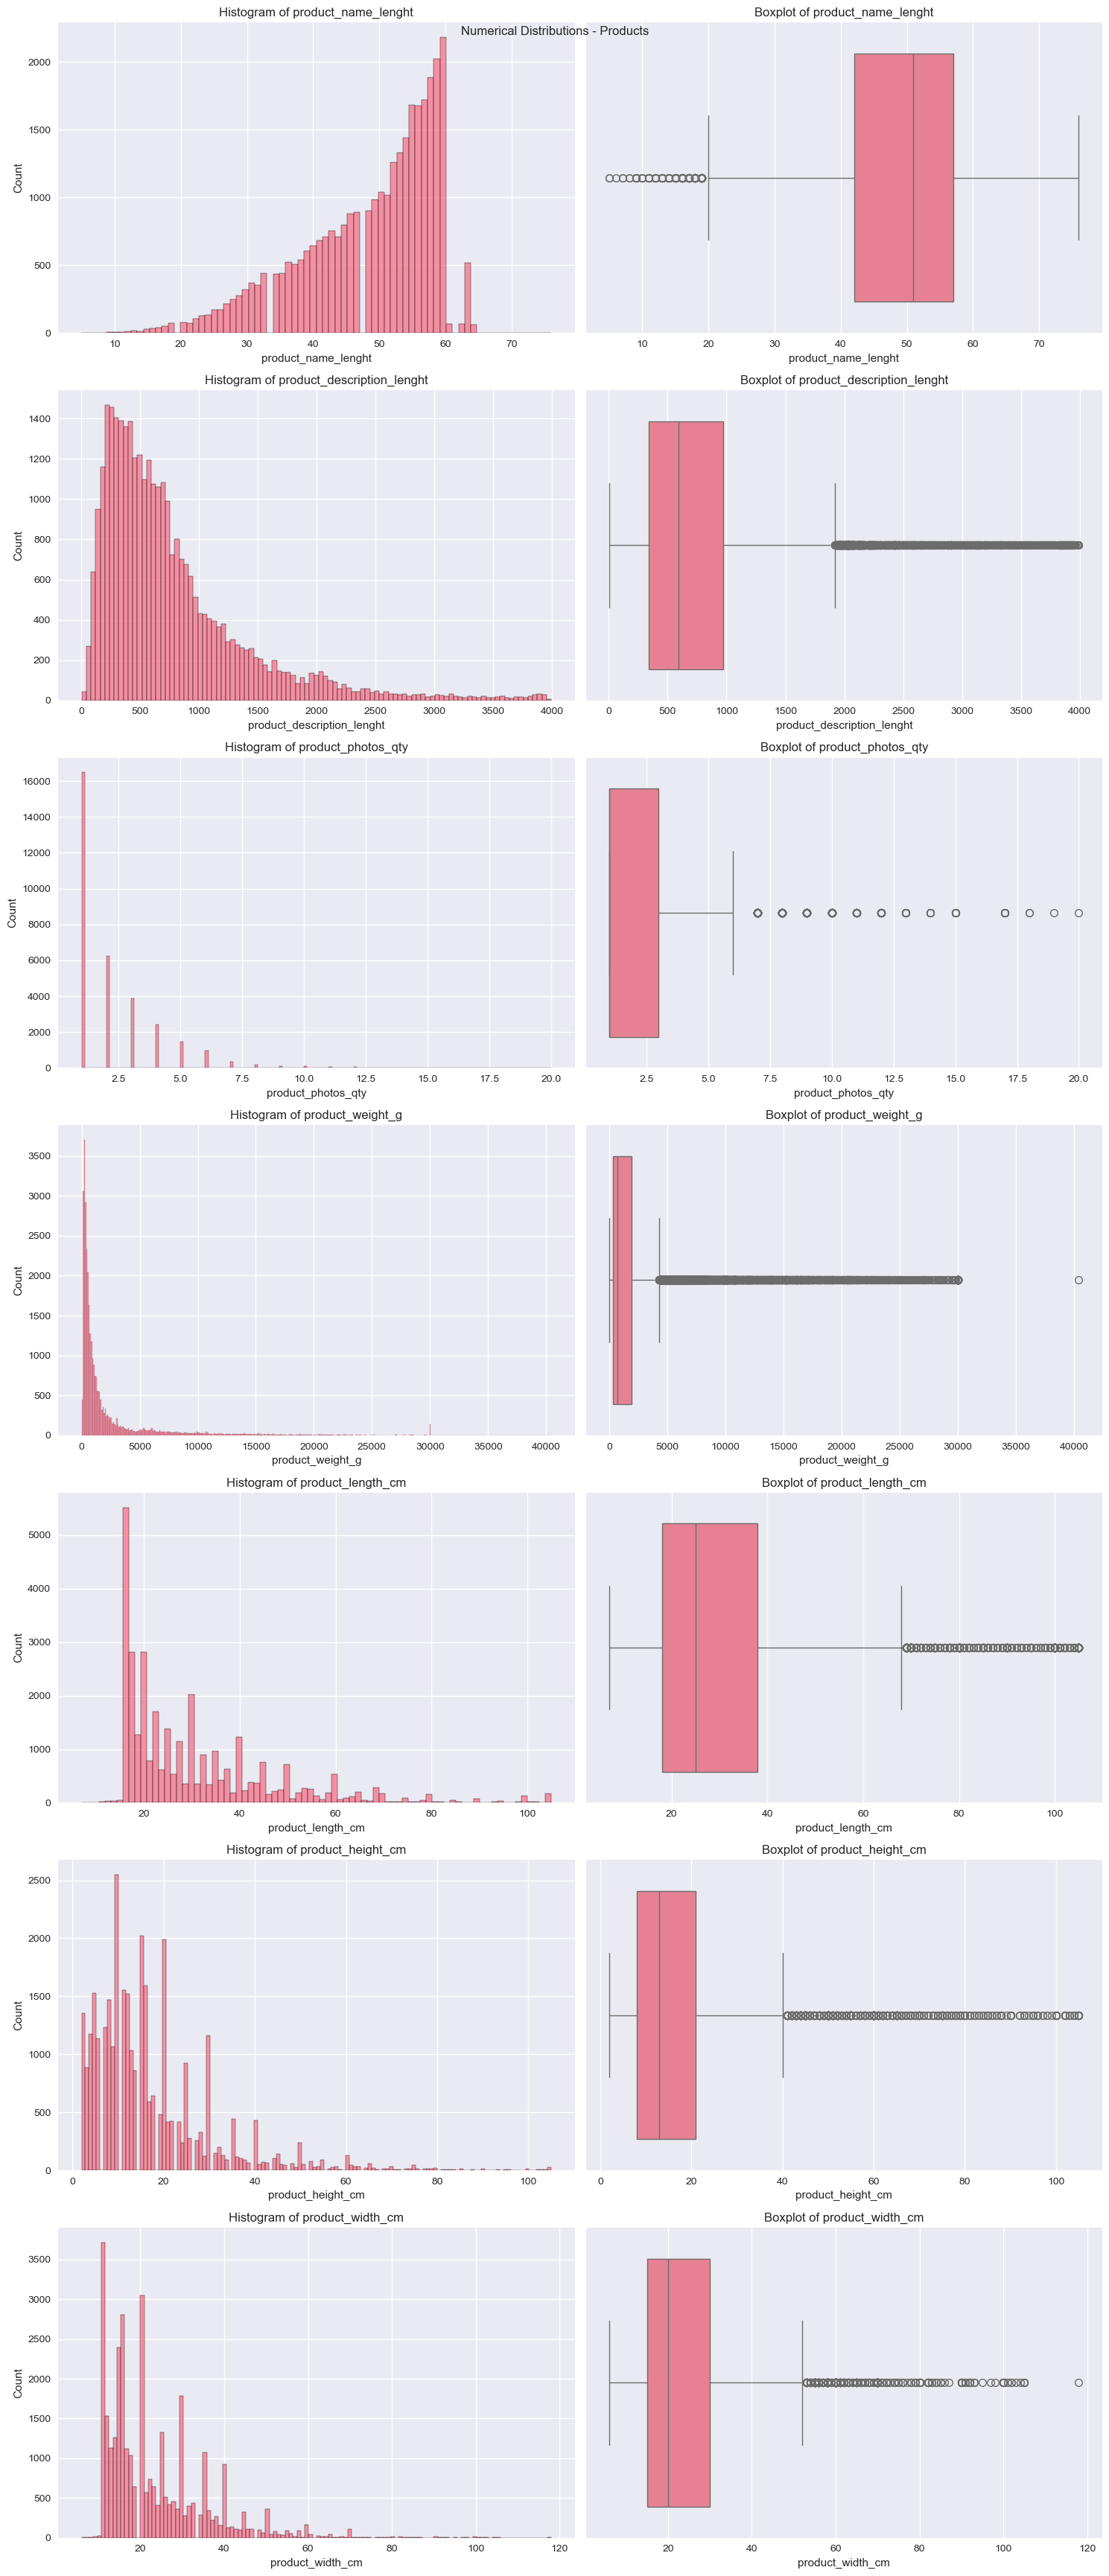


Distribution Analysis for Sellers


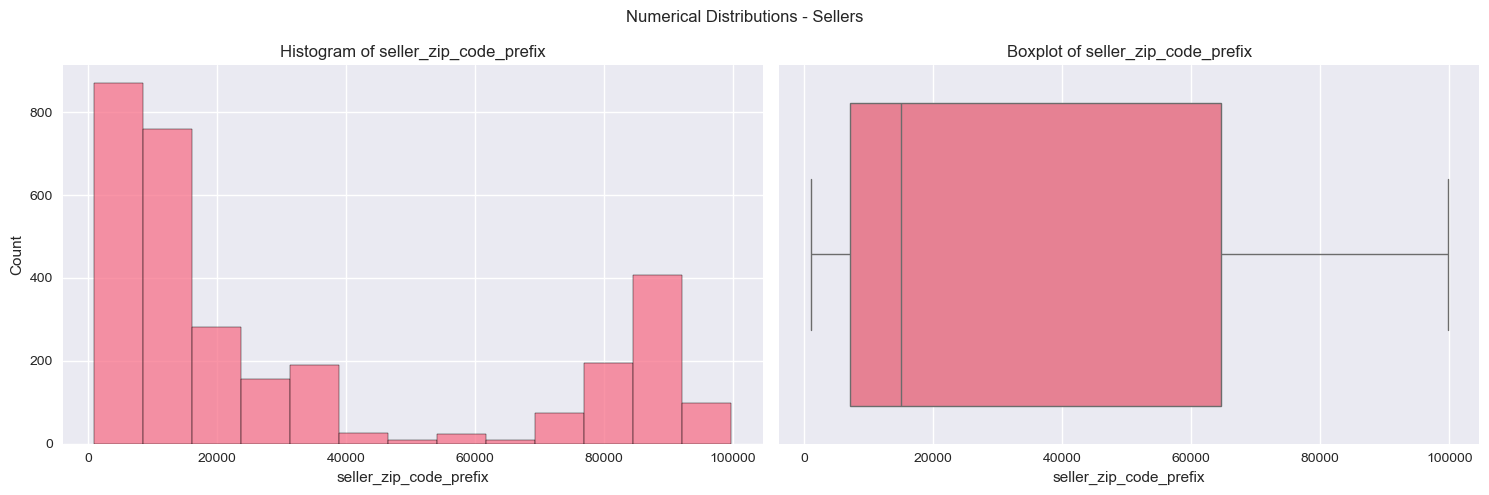

In [11]:
# 3. Data Distribution Analysis

def analyze_distributions(df, dataset_name):
    """
    Analyze and plot distributions of numerical and categorical variables
    """
    print(f"\nDistribution Analysis for {dataset_name}")
    
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Numerical distributions
    if len(numerical_cols) > 0:
        fig, axes = plt.subplots(len(numerical_cols), 2, 
                                figsize=(15, 5*len(numerical_cols)))
        fig.suptitle(f'Numerical Distributions - {dataset_name}')
        
        # Convert axes to 2D array if there's only one numerical column
        if len(numerical_cols) == 1:
            axes = np.array([axes])
        
        for idx, col in enumerate(numerical_cols):
            # Histogram
            sns.histplot(data=df, x=col, ax=axes[idx, 0])
            axes[idx, 0].set_title(f'Histogram of {col}')
            
            # Box plot
            sns.boxplot(data=df, x=col, ax=axes[idx, 1])
            axes[idx, 1].set_title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()
    


# Run distribution analysis for each dataset
for name, df in [("Customers", customers_df), 
                ("Orders", orders_df),
                ("Order Items", order_items_df),
                ("Products", products_df),
                ("Sellers", sellers_df)]:
    analyze_distributions(df, name)

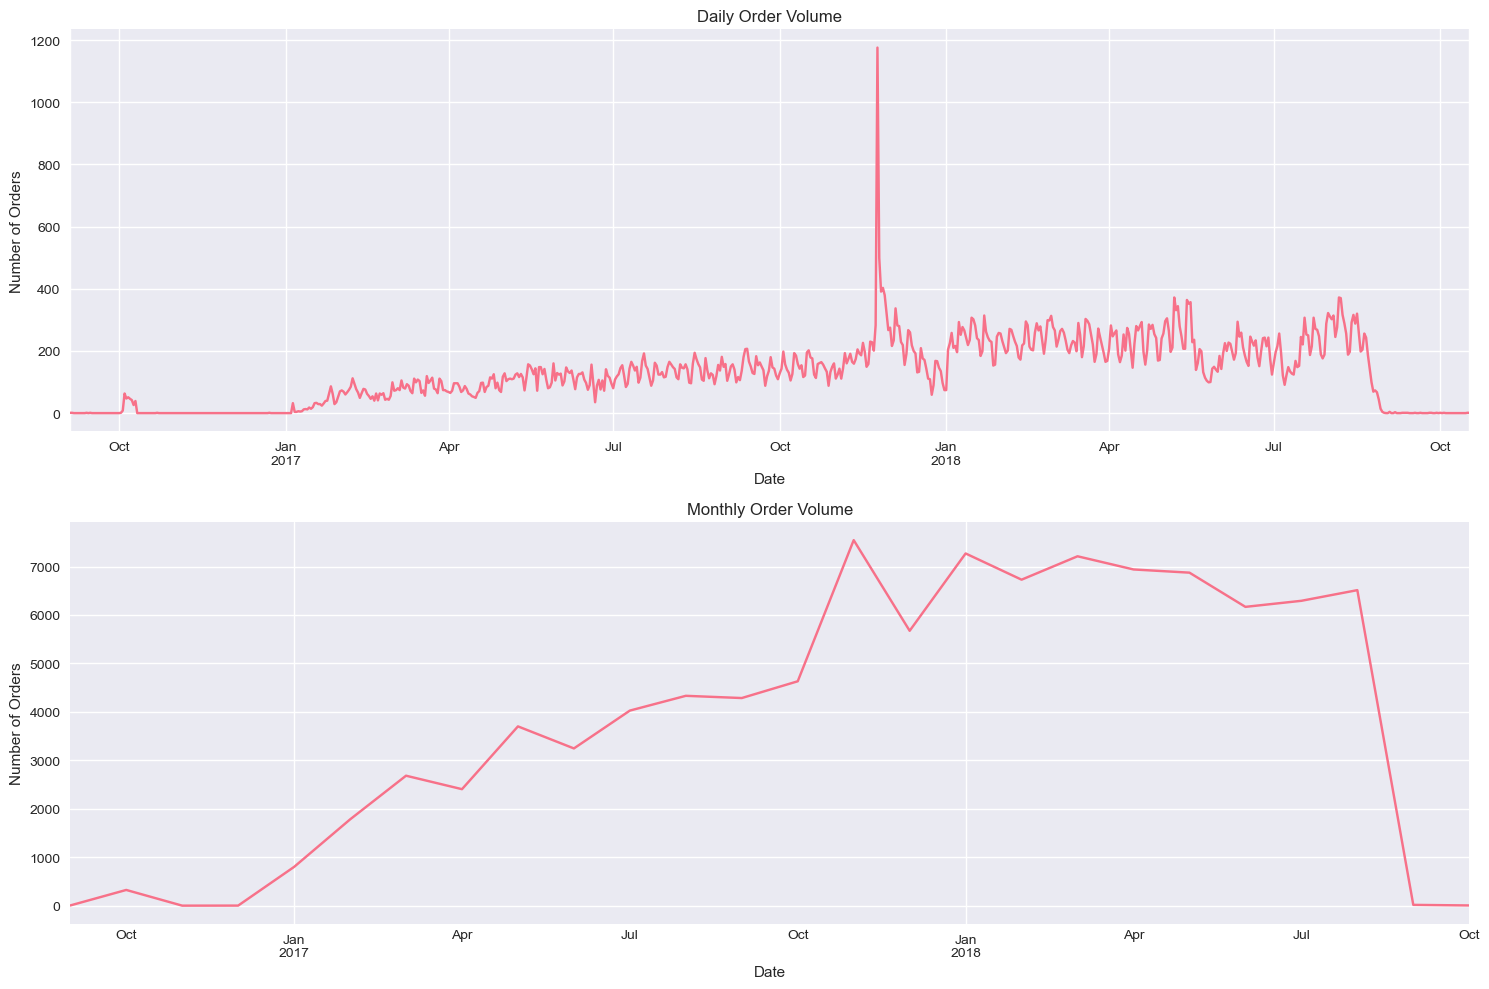

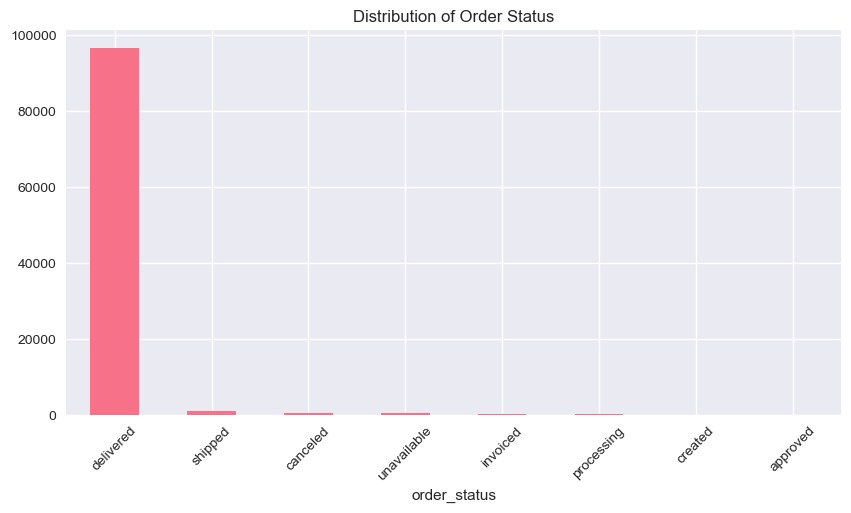

In [12]:
# 4. Temporal Analysis (for Orders)

def analyze_order_patterns():
    """
    Analyze ordering patterns over time
    """
    # Convert order_purchase_timestamp to datetime
    orders_df['order_purchase_timestamp'] = pd.to_datetime(
        orders_df['order_purchase_timestamp']
    )
    
    # Daily orders
    daily_orders = orders_df.resample('D', 
        on='order_purchase_timestamp').size()
    
    # Monthly orders
    monthly_orders = orders_df.resample('M', 
        on='order_purchase_timestamp').size()
    
    # Plot trends
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Daily trend
    daily_orders.plot(ax=ax1)
    ax1.set_title('Daily Order Volume')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Orders')
    
    # Monthly trend
    monthly_orders.plot(ax=ax2)
    ax2.set_title('Monthly Order Volume')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Number of Orders')
    
    plt.tight_layout()
    plt.show()
    
    # Order status distribution
    plt.figure(figsize=(10, 5))
    orders_df['order_status'].value_counts().plot(kind='bar')
    plt.title('Distribution of Order Status')
    plt.xticks(rotation=45)
    plt.show()

analyze_order_patterns()

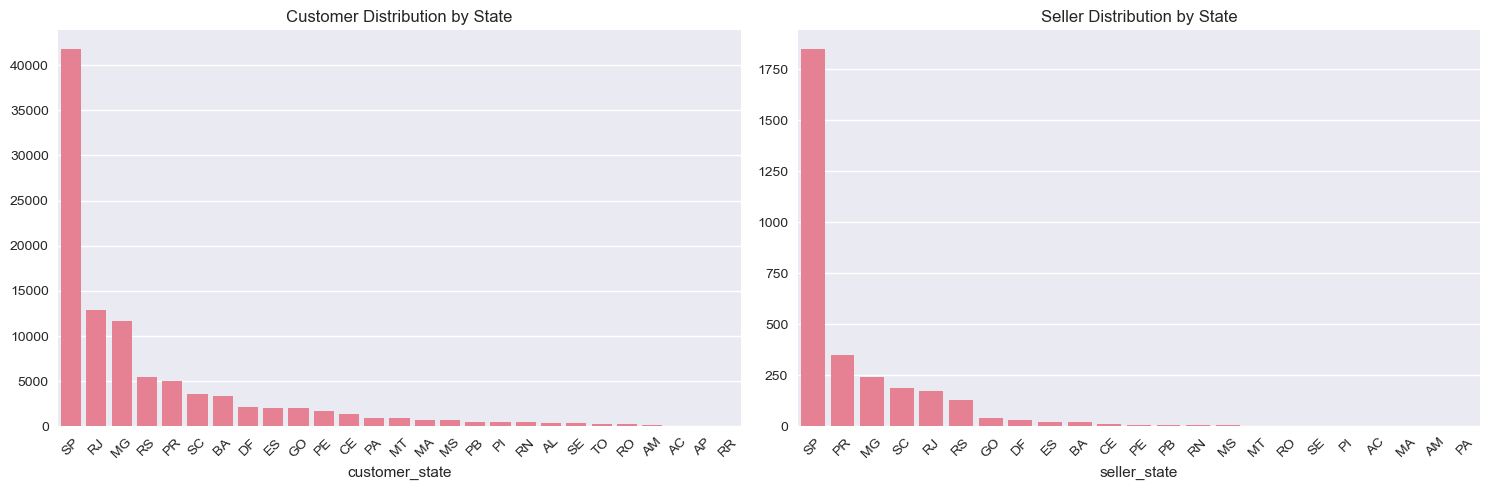

In [13]:
# 5. Geographic Analysis

def analyze_geographic_distribution():
    """
    Analyze geographic distribution of customers and sellers
    """
    # Customer geographic distribution
    customer_states = customers_df['customer_state'].value_counts()
    
    # Seller geographic distribution
    seller_states = sellers_df['seller_state'].value_counts()
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Customers
    sns.barplot(x=customer_states.index, y=customer_states.values, ax=ax1)
    ax1.set_title('Customer Distribution by State')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    
    # Sellers
    sns.barplot(x=seller_states.index, y=seller_states.values, ax=ax2)
    ax2.set_title('Seller Distribution by State')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

analyze_geographic_distribution()

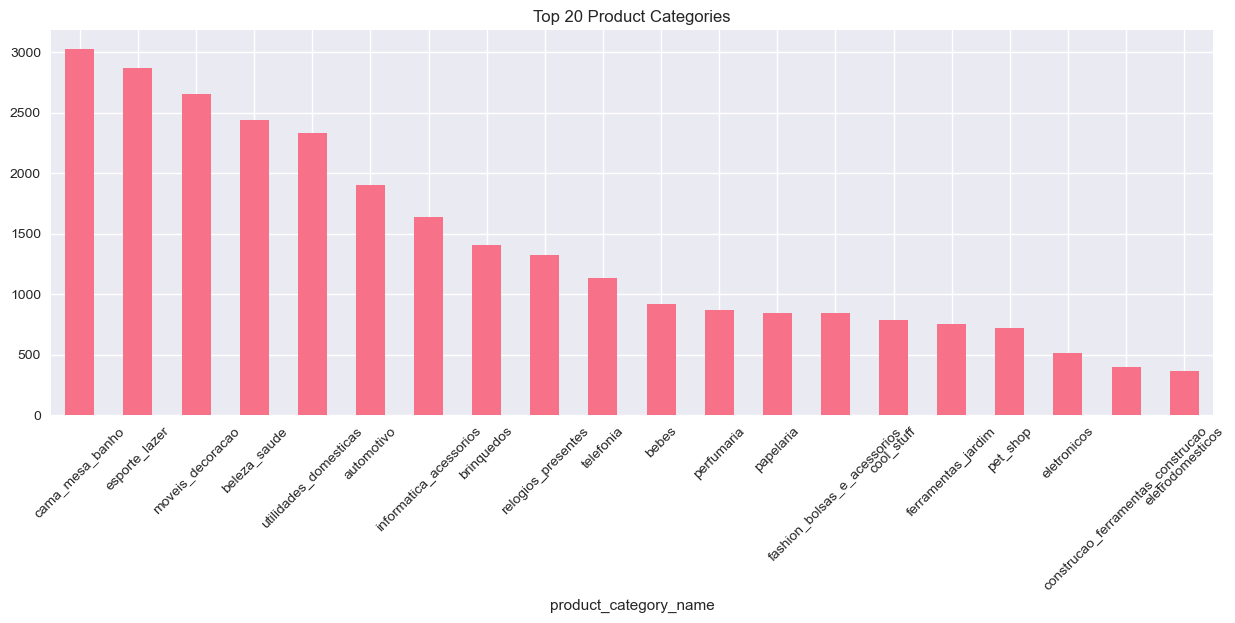

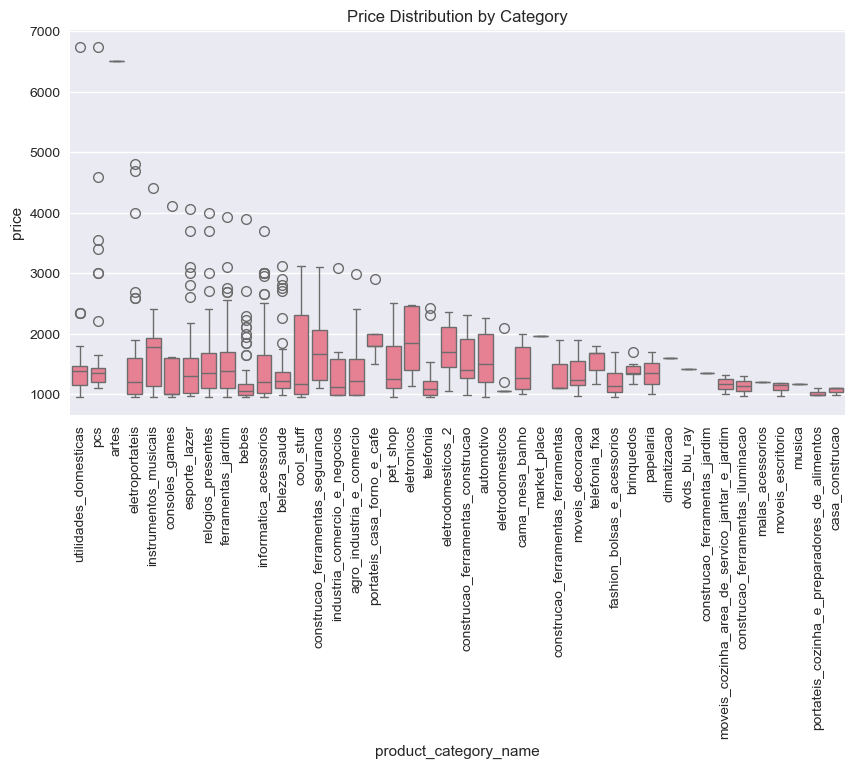

In [14]:
# 6. Product Analysis

def analyze_products():
    """
    Analyze product categories and pricing
    """
    # Product category distribution
    plt.figure(figsize=(15, 5))
    products_df['product_category_name'].value_counts()[:20].plot(kind='bar')
    plt.title('Top 20 Product Categories')
    plt.xticks(rotation=45)
    plt.show()
    
    # Price distribution
    merged_products = order_items_df.merge(
        products_df, on='product_id'
    )
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='product_category_name', 
                y='price', 
                data=merged_products.sort_values('price', ascending=False)[:1000])
    plt.xticks(rotation=90)
    plt.title('Price Distribution by Category')
    plt.show()

analyze_products()

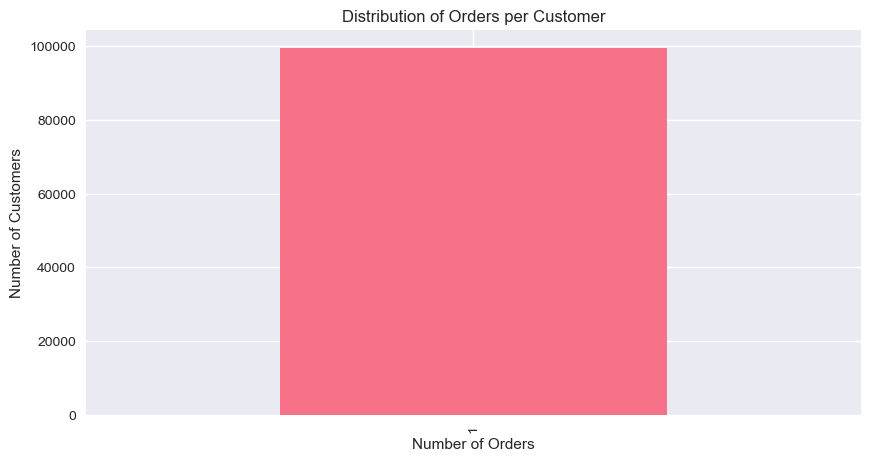

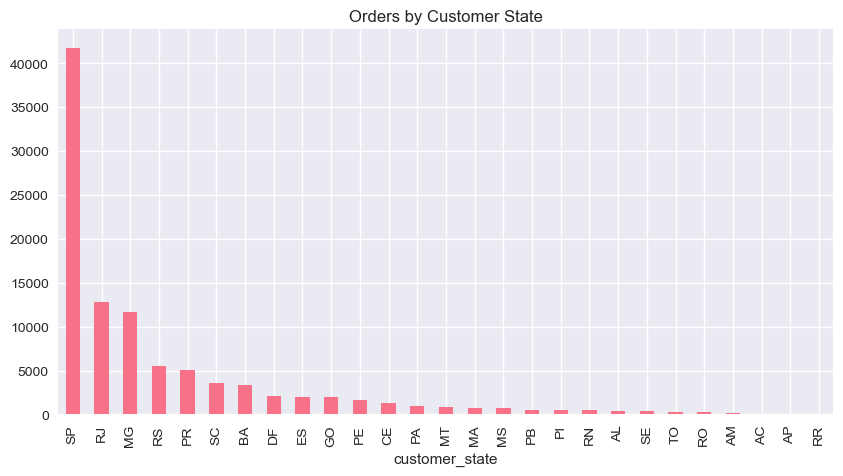

In [15]:
# 7. Customer Analysis

def analyze_customers():
    """
    Analyze customer behavior
    """
    # Merge orders with customers
    customer_orders = orders_df.merge(
        customers_df, on='customer_id'
    )
    
    # Orders per customer
    orders_per_customer = customer_orders.groupby(
        'customer_id'
    ).size().value_counts()
    
    plt.figure(figsize=(10, 5))
    orders_per_customer.plot(kind='bar')
    plt.title('Distribution of Orders per Customer')
    plt.xlabel('Number of Orders')
    plt.ylabel('Number of Customers')
    plt.show()
    
    # Customer state distribution
    plt.figure(figsize=(10, 5))
    customer_orders['customer_state'].value_counts().plot(kind='bar')
    plt.title('Orders by Customer State')
    plt.show()

analyze_customers()

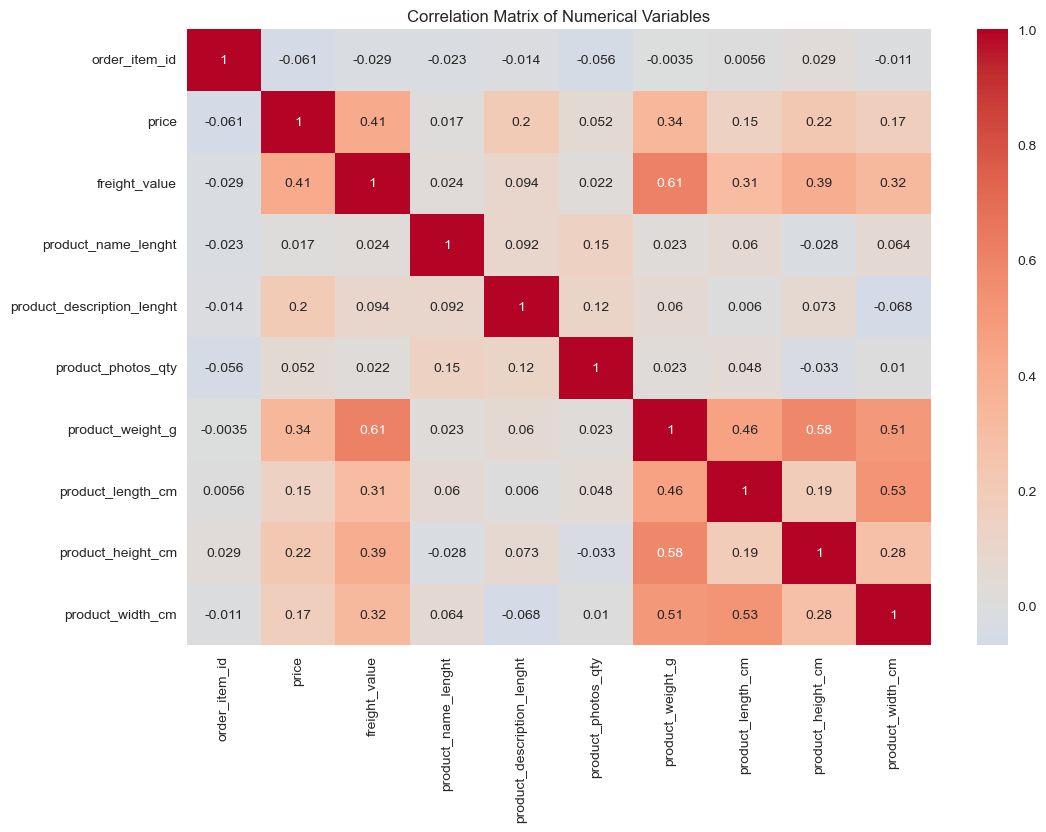

In [16]:
# 8. Correlation Analysis

def analyze_correlations():
    """
    Analyze correlations between numerical variables
    """
    # Merge relevant dataframes
    merged_df = order_items_df.merge(
        orders_df, on='order_id'
    ).merge(
        products_df, on='product_id'
    )
    
    # Select numerical columns
    numerical_cols = merged_df.select_dtypes(
        include=['int64', 'float64']
    ).columns
    
    # Create correlation matrix
    correlation_matrix = merged_df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()

analyze_correlations()

In [17]:
# 9. Key Insights Summary

def summarize_insights():
    """
    Summarize key findings from the EDA
    """
    print("Key Insights from Initial EDA:")
    print("\n1. Data Quality:")
    print("   - List main data quality issues found")
    print("   - Missing values statistics")
    print("   - Data type inconsistencies")
    
    print("\n2. Customer Behavior:")
    print("   - Average orders per customer")
    print("   - Geographic distribution")
    print("   - Popular product categories")
    
    print("\n3. Order Patterns:")
    print("   - Peak ordering times")
    print("   - Order status distribution")
    print("   - Delivery time patterns")
    
    print("\n4. Product Insights:")
    print("   - Price distribution")
    print("   - Popular categories")
    print("   - Correlation with orders")
    
    print("\n5. Recommendations for Further Analysis:")
    print("   - List areas that need deeper investigation")
    print("   - Potential feature engineering ideas")
    print("   - Data cleaning requirements")

summarize_insights()

Key Insights from Initial EDA:

1. Data Quality:
   - List main data quality issues found
   - Missing values statistics
   - Data type inconsistencies

2. Customer Behavior:
   - Average orders per customer
   - Geographic distribution
   - Popular product categories

3. Order Patterns:
   - Peak ordering times
   - Order status distribution
   - Delivery time patterns

4. Product Insights:
   - Price distribution
   - Popular categories
   - Correlation with orders

5. Recommendations for Further Analysis:
   - List areas that need deeper investigation
   - Potential feature engineering ideas
   - Data cleaning requirements
